# Scatter plot with line cuts

This notebook shows how to make a scatter plot with linecuts using the qdevplot library.
The qdevplot library is a collection of nice plots used in Qdev wrapped in to a function for easy sharring and reuse. 


In [1]:
import qdevplot.plotfunctions as qp
import numpy as np
import matplotlib.pyplot as plt

### Note on fontsize
Instead of setting the fontsize individuely it is eassier to change the default sizes. The bellow defaults are recomended for powerpoint precentations.
If you use this defaults it is important that you do not resize the figure inside powerpoint, but instead   change the figuresize befor exporting

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 16,
          'figure.figsize': (8, 8),
         'axes.labelsize': 18,
         'axes.titlesize':18,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

This notebook deals with a situation where you have measured a 2d quantity Z and want to plot is as a heatmap as a function of X and Ymea, where Ymeas is also a measured 2d quantity depending on Y. Thus we make some data  

In [3]:
x = np.arange(0,10,0.1)*0.1
y = np.arange(0,10,0.1)*0.1
xx, yy = np.meshgrid(x, y)
z = np.cos(xx*2*np.pi)+np.sin(yy) 
Xmeas = xx**2 - 0.1*yy + 0.3*xx**3
Ymeas = yy**2 - 0.1*xx + 0.3*xx**3

### plotting scatter and line cuts (scoop version)

To make the scatter and line cuts plot we sipmply pass the four arrays ant the list  line cutst to the function plot_scatter_linecut

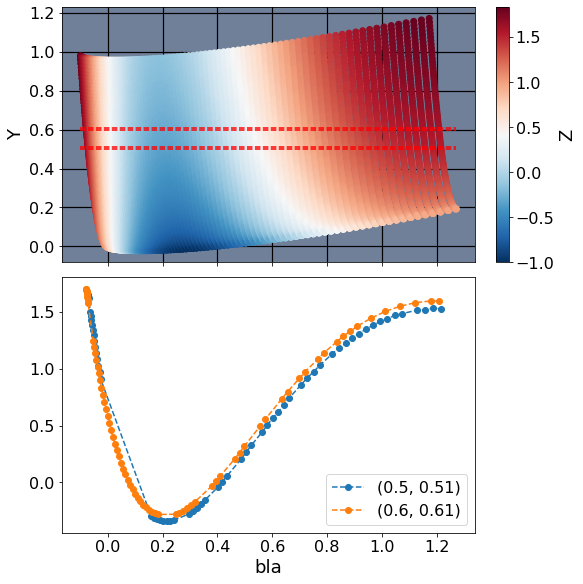

In [4]:
ax1, cb, ax2 = qp.plot_scatter_linescoop(x, y, z, ymeas=Ymeas, xmeas=Xmeas, ivallist =[(0.5,0.51),(0.6,0.61)], x_label='bla')

### plotting scatter and line cuts

To make the scatter and line cuts plot we sipmply pass the four arrays ant the list  line cutst to the function plot_scatter_linecut

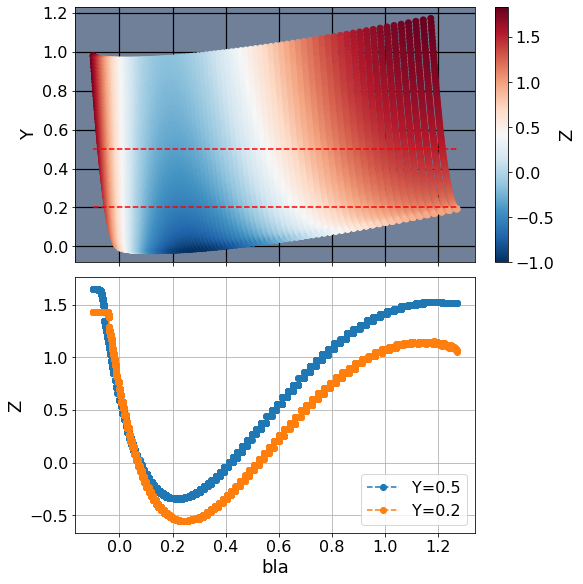

In [5]:
cut_list = [0.5,0.2]
ax1, cb, ax2 = qp.plot_scatter_linecut(x, y, z, ymeas=Ymeas, xmeas=Xmeas, ylist =  cut_list, x_label='bla')


We can also just plot the scatter plot using plot_ scatter

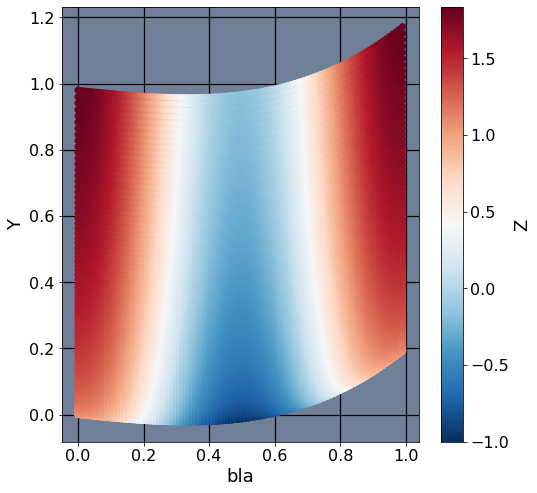

In [6]:
ax, cb= qp.plot_scatter(x, y, z, ymeas=Ymeas, x_label='bla')

Or we can plot the linecut using plot_line_cuts

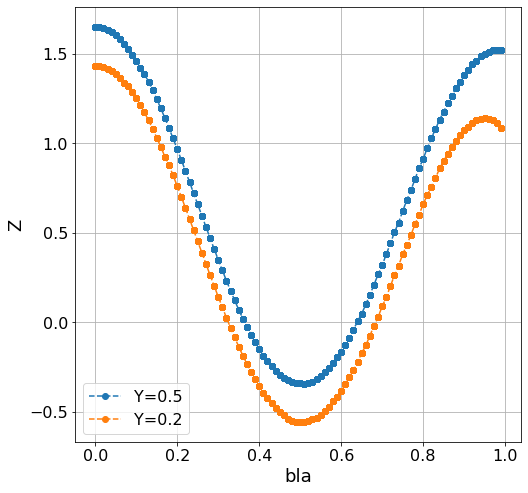

In [7]:
ax = qp.plot_line_cuts(x, y, z, ymeas=Ymeas, ylist =  cut_list, x_label='bla')

### Note on customisation

All the plot functions returns the axis objekts of the plot, making it easy to modify limits, labels, etc.

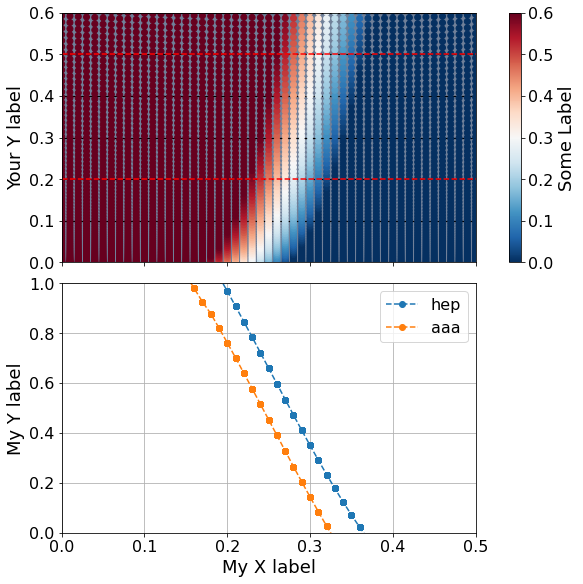

In [9]:
cut_list = [0.5,0.2]
ax1, cb, ax2 = qp.plot_scatter_linecut(x, y, z, ymeas=Ymeas, ylist =  cut_list, x_label='bla')
cb.mappable.set_clim(0,0.6)
cb.set_label('Some Label')
ax1.set_ylim(0,0.6)
ax2.set_xlim(0,0.5)
ax2.set_ylim(0,1)
ax2.set_xlabel('My X label')
ax2.set_ylabel('My Y label')
ax1.set_ylabel('Your Y label')
legend_handes = ax2.get_legend_handles_labels()
ax2.legend(legend_handes[0],['hep','aaa'])


## Changing units on an axis 

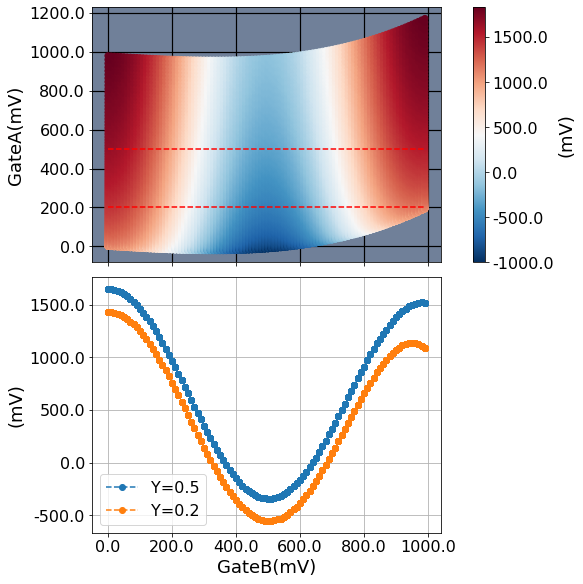

In [10]:
cut_list = [0.5,0.2]
ax1, cb, ax2 = qp.plot_scatter_linecut(x, y, z, ymeas=Ymeas, ylist =  cut_list, x_label='bla')
ax1 = qp.change_unit_axis(ax1,'y',1e-3,'GateA(mV)')
ax2 = qp.change_unit_axis(ax2,'y',1e-3,'(mV)')
ax2 = qp.change_unit_axis(ax2,'x',1e-3,'GateB(mV)')
cb = qp.change_unit_axis(cb,'cb',1e-3,'(mV)')
plt.show()

Convenience function to set aspect ratio to reflect the distance (assuming that the metric for x and y axis are the same)

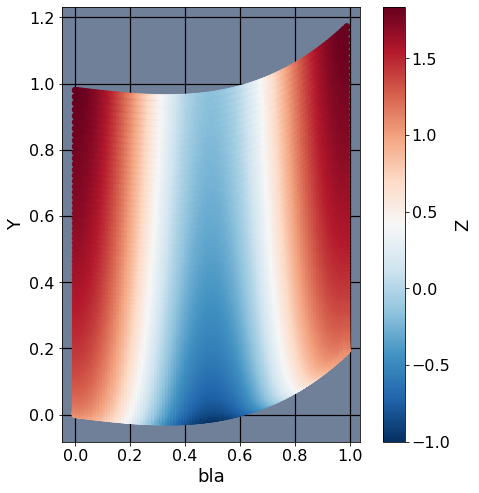

In [11]:
ax, cb= qp.plot_scatter(x, y, z, ymeas=Ymeas, x_label='bla')
ax = qp.set_real_aspect(ax)